
Title: Linear Regression Project for Medical Insurance Forecast

Data source: https://www.kaggle.com/datasets/mirichoi0218/insurance?resource=download


Dependent variable: Charges



In [36]:
#importing dependencies and packages
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [5]:
data = pd.read_csv("insurance.csv")

UNDERSTANDING THE DATASET


In [6]:
data.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
data.shape

(1338, 7)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [12]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [13]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [17]:
#CONVERTING OBJECT TYPES TO CATERGORY
data['sex'] = data['sex'].astype('category')
data['smoker'] = data['smoker'].astype('category')
data['region'] = data['region'].astype('category')
data.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

In [18]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [24]:
#The average charge for respective sex categories
sex_data = data.groupby("sex").mean().round(1)
print (sex_data)

         age   bmi  children  charges
sex                                  
female  39.5  30.4       1.1  12569.6
male    38.9  30.9       1.1  13956.8


In [22]:
#The average charge for respective smokers and non-smokers
smoke_data = data.groupby("smoker").mean().round(1)
print (smoke_data)

#It is to be noted from the data taht smokers pay a lot more than non smokers. Smoking in a major predictor of charge

         age   bmi  children  charges
smoker                               
no      39.4  30.7       1.1   8434.3
yes     38.5  30.7       1.1  32050.2


In [25]:
##The average charge for respective various regions
region_data = data.groupby("region").mean().round(1)
print (region_data)

            age   bmi  children  charges
region                                  
northeast  39.3  29.2       1.0  13406.4
northwest  39.2  29.2       1.1  12417.6
southeast  38.9  33.4       1.0  14735.4
southwest  39.5  30.6       1.1  12346.9


DATA VISUALIZATION


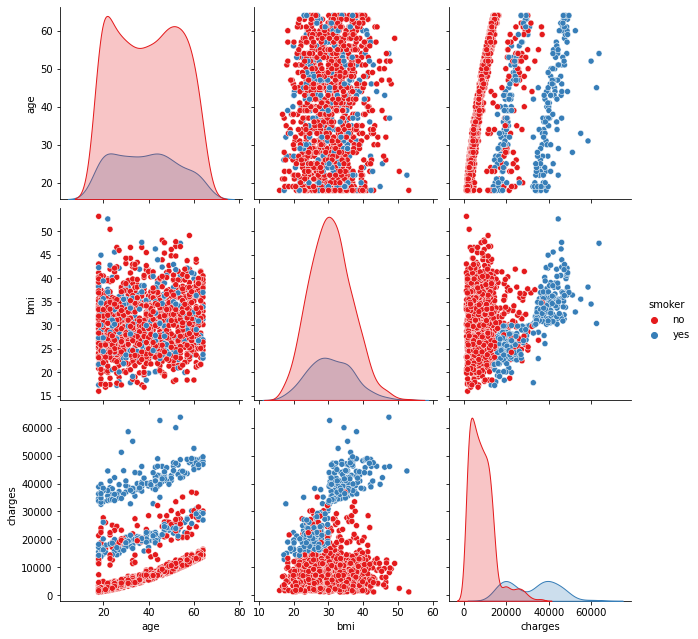

In [27]:
sns.pairplot(
    data[["age", "bmi", "charges", "smoker"]],
    hue = "smoker",
    height = 3,
    palette = "Set1")

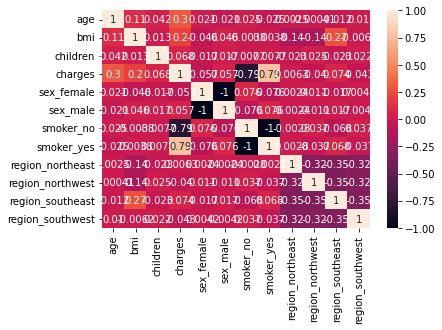

In [50]:
sns.heatmap(data.corr(), annot= True)


In [30]:
#One hot encoding
data = pd.get_dummies(data)
data.columns


Index(['age', 'bmi', 'children', 'charges', 'sex_female', 'sex_male',
       'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

In [31]:
data.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [32]:
y = data["charges"]


In [33]:
X = data.drop("charges", axis = 1)


BUILDING THE LINEAR REGRESSION MODEL

In [42]:
X_train,X_test,y_train,y_test=train_test_split(
    X,y, 
    train_size = 0.75, 
    random_state = 1)

In [43]:
reg = LinearRegression()


In [44]:
reg.fit(X_train,y_train)


LinearRegression()

MODEL EVALUATION

In [45]:
reg.score(X_test, y_test).round(3)

0.734

In [46]:
reg.score(X_train, y_train).round(3)


0.755

MODEL PREDICTION


In [48]:
#predicted value
data_new = X_train[:1]
reg.predict(data_new)


array([3513.00600702])

In [49]:
#actual value

y_train[:1]


1043    3161.454
Name: charges, dtype: float64